In [1]:
!pip install kneed

In [2]:
from kneed import KneeLocator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-whitegrid')

/tmp/ipykernel_283/1469656925.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-whitegrid')


2 h2o open knee value: 0.4064, corresponding P: 2.097731849 km
3 h2o open knee value: 0.4399, corresponding P: 2.909229952 km
4 h2o open knee value: 0.4488, corresponding P: 4.498489713 km
5 h2o open knee value: 0.4862, corresponding P: 5.665558941 km
6 h2o open knee value: 0.5045, corresponding P: 7.197192199 km
7 h2o open knee value: 0.4995, corresponding P: 9.088722831 km
8 h2o open knee value: 0.5687, corresponding P: 10.21593971 km


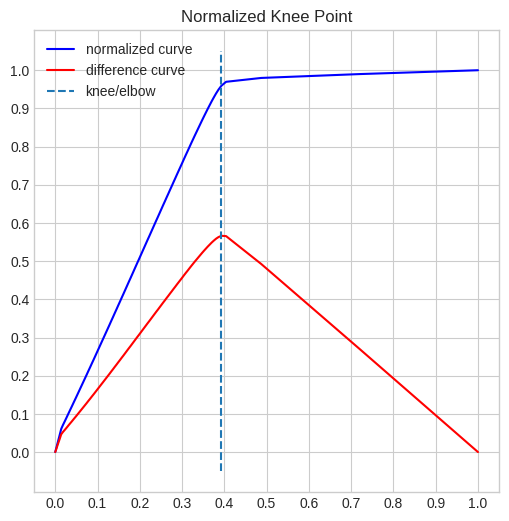

<Figure size 600x600 with 0 Axes>

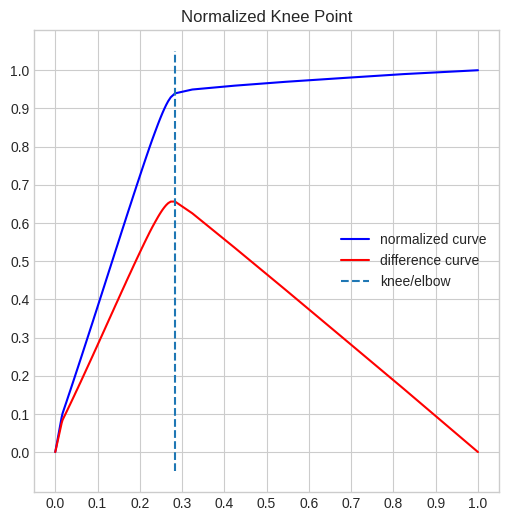

<Figure size 600x600 with 0 Axes>

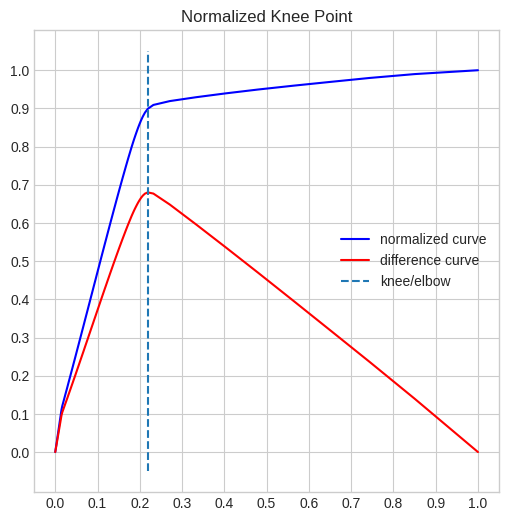

<Figure size 600x600 with 0 Axes>

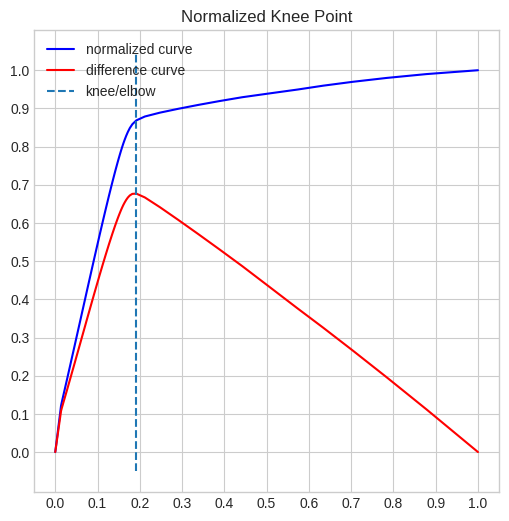

<Figure size 600x600 with 0 Axes>

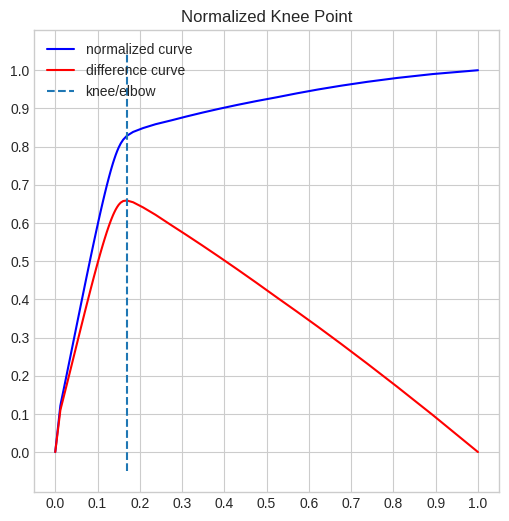

<Figure size 600x600 with 0 Axes>

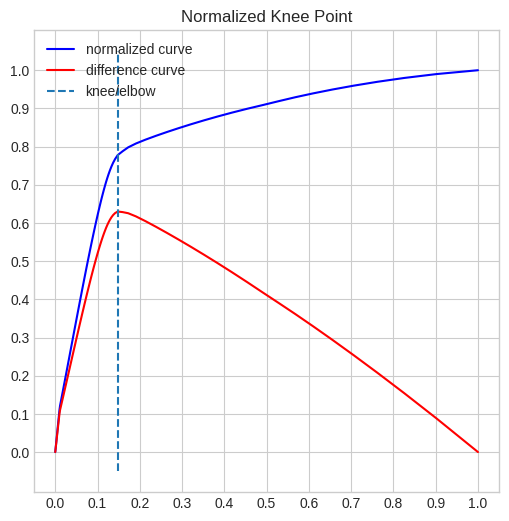

<Figure size 600x600 with 0 Axes>

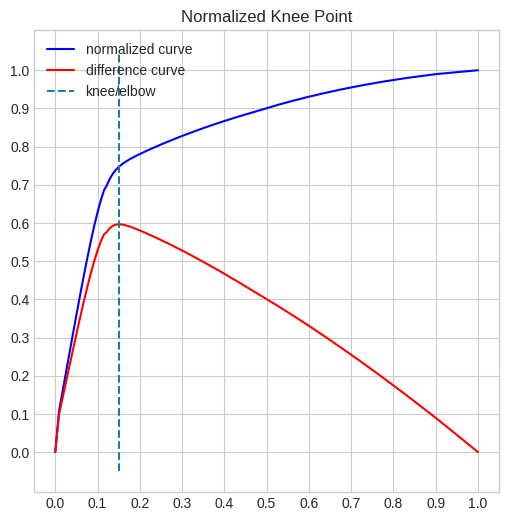

<Figure size 600x600 with 0 Axes>

In [3]:
datasets = ["2 h2o open", "3 h2o open", "4 h2o open", "5 h2o open", "6 h2o open", "7 h2o open", "8 h2o open"]

for dataset in datasets:
    magic_data = pd.read_csv(f"{dataset}.csv")
    
    magic = KneeLocator(
        magic_data['delta log viscosity (poise)'].values,
        magic_data['P (kbars)'].values,
        S=10,
        curve='convex',
        direction='decreasing',
        online=True
    )
    
    knee_value = magic.knee
    
    P_array = magic_data['P (kbars)'].values
    delta_log_viscosity_array = magic_data['delta log viscosity (poise)'].values
    depth_array = magic_data['Depth (km)'].values

    closest_index = (np.abs(delta_log_viscosity_array - knee_value)).argmin()
    depth_value = depth_array[closest_index]
    
    print(f"{dataset} knee value: {knee_value}, corresponding P: {depth_value} km")
    magic.plot_knee_normalized()
    
    magic.plot_knee()
    
    plt.savefig(f"{dataset}_knee_plot.svg", format='svg')
    
    plt.clf()